In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_csv(r"C:\Users\DELL\trade_strategy\HINDALCO.csv",index_col = 'datetime')
data

,close,high,low,open,volume,instrument
datetime,,,,,,
2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO
...,...,...,...,...,...,...
2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO
2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO
2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO


In [19]:
#This selects the 'Adj Close' column
close = data['close']
#This converts the date strings in the index into pandas datetime format:
close.index = pd.to_datetime(close.index)
close

datetime
2014-01-24    114.00
2014-01-27    111.10
2014-01-28    113.80
2014-01-29    111.75
2014-01-30    108.10
               ...  
2018-12-21    224.00
2018-12-24    217.85
2018-12-26    218.60
2018-12-27    220.60
2018-12-28    223.50
Name: close, Length: 1215, dtype: float64

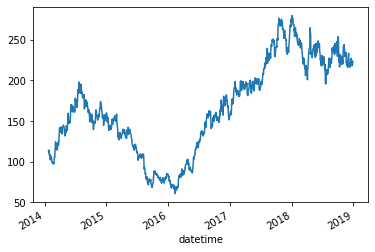

In [20]:
close.plot()
plt.show()

In [21]:
sma50 = close.rolling(window=50).mean()
sma50

datetime
2014-01-24        NaN
2014-01-27        NaN
2014-01-28        NaN
2014-01-29        NaN
2014-01-30        NaN
               ...   
2018-12-21    226.302
2018-12-24    226.121
2018-12-26    226.163
2018-12-27    226.041
2018-12-28    225.876
Name: close, Length: 1215, dtype: float64

In [22]:
sma50.iloc[45:52]

datetime
2014-03-31        NaN
2014-04-01        NaN
2014-04-02        NaN
2014-04-03        NaN
2014-04-04    113.530
2014-04-07    113.997
2014-04-09    114.633
Name: close, dtype: float64

In [23]:
plt.style.use('fivethirtyeight')

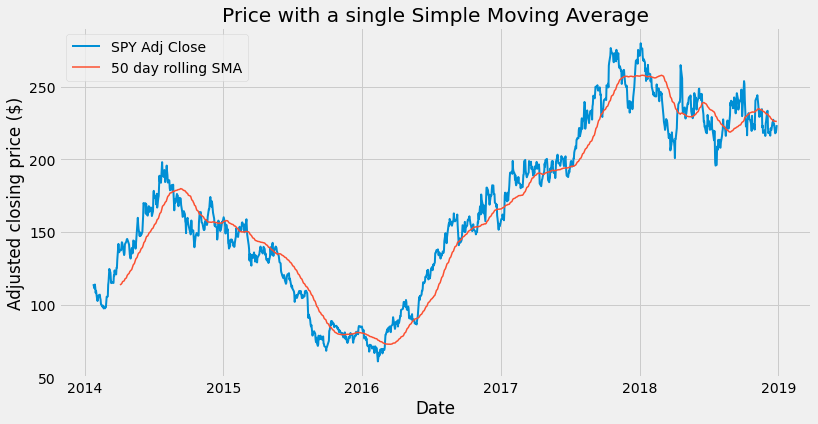

In [24]:
#The size for our chart:
plt.figure(figsize = (12,6))
#Plotting price and SMA lines:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
#Adding title and labeles on the axes, making legend visible:
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with a single Simple Moving Average')
plt.legend()
plt.show()

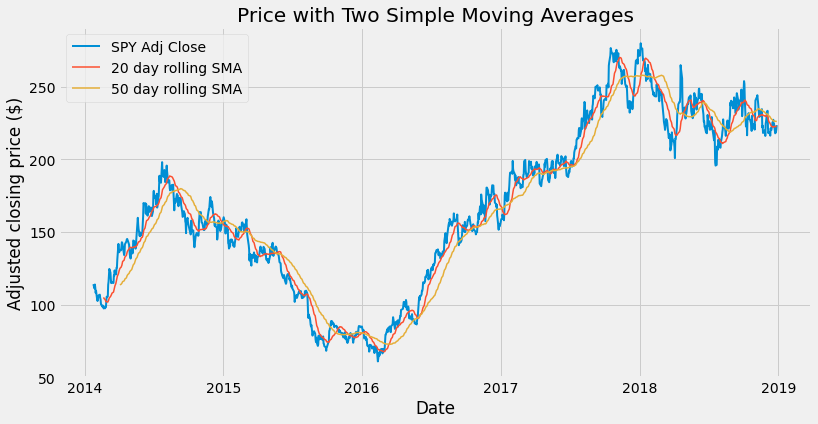

In [25]:
sma20 = close.rolling(window=20).mean()
plt.figure(figsize = (12,6))
#Plotting price with two SMAs:
plt.plot(close, label='SPY Adj Close', linewidth = 2)
plt.plot(sma20, label='20 day rolling SMA', linewidth = 1.5)
plt.plot(sma50, label='50 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages')
plt.legend()
plt.show()

In [26]:
priceSma_df = pd.DataFrame({
      'Adj Close' : close,
      'SMA 20' : sma20,
      'SMA 50' : sma50
     })
priceSma_df

,Adj Close,SMA 20,SMA 50
datetime,,,
2014-01-24,114.00,NaN,NaN
2014-01-27,111.10,NaN,NaN
2014-01-28,113.80,NaN,NaN
2014-01-29,111.75,NaN,NaN
2014-01-30,108.10,NaN,NaN
...,...,...,...
2018-12-21,224.00,222.5775,226.302
2018-12-24,217.85,222.5300,226.121
2018-12-26,218.60,222.4650,226.163


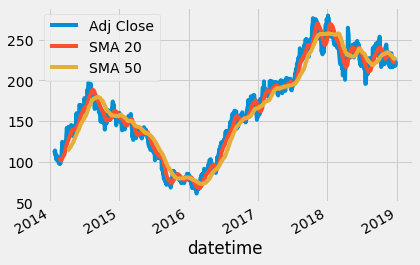

In [27]:
priceSma_df.plot()
plt.show()

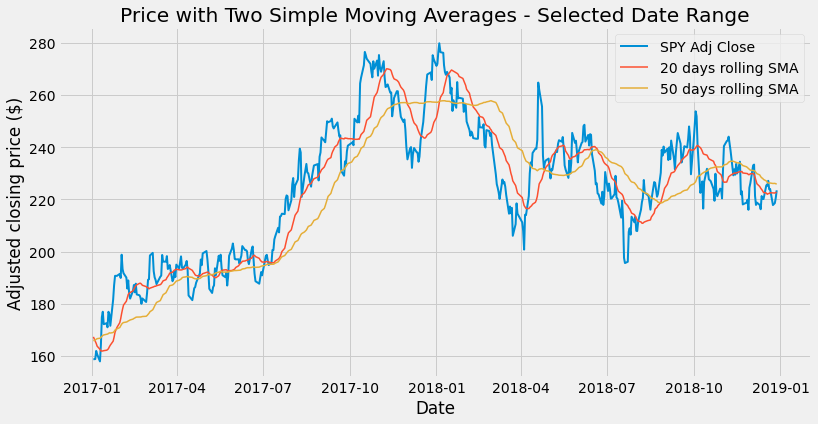

In [28]:
plt.figure(figsize = (12,6))
#Plotting price and two SMAs with a specified date range:
plt.plot(priceSma_df['2017':'2018']['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df['2017':'2018']['SMA 20'], label='20 days rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df['2017':'2018']['SMA 50'], label='50 days rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Two Simple Moving Averages - Selected Date Range')
plt.legend()
plt.show()

In [29]:
sma200 = close.rolling(window=200).mean()
priceSma_df['SMA 200'] = sma200
priceSma_df

,Adj Close,SMA 20,SMA 50,SMA 200
datetime,,,,
2014-01-24,114.00,NaN,NaN,NaN
2014-01-27,111.10,NaN,NaN,NaN
2014-01-28,113.80,NaN,NaN,NaN
2014-01-29,111.75,NaN,NaN,NaN
2014-01-30,108.10,NaN,NaN,NaN
...,...,...,...,...
2018-12-21,224.00,222.5775,226.302,228.35025
2018-12-24,217.85,222.5300,226.121,228.23550
2018-12-26,218.60,222.4650,226.163,228.18050


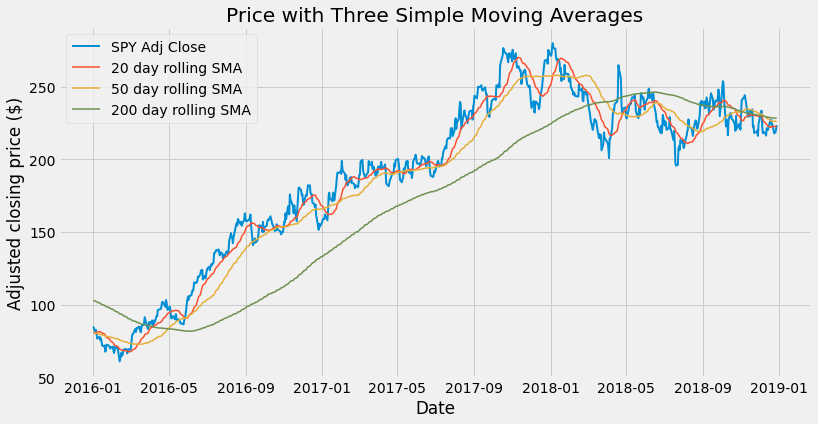

In [30]:
#Our start and end dates:
start = '2016'
end = '2019'
plt.figure(figsize = (12,6))
#Plotting price and three SMAs with start and end dates:
plt.plot(priceSma_df[start:end]['Adj Close'], label='SPY Adj Close', linewidth = 2)
plt.plot(priceSma_df[start:end]['SMA 20'], label='20 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 50'], label='50 day rolling SMA', linewidth = 1.5)
plt.plot(priceSma_df[start:end]['SMA 200'], label='200 day rolling SMA', linewidth = 1.5)
plt.xlabel('Date')
plt.ylabel('Adjusted closing price ($)')
plt.title('Price with Three Simple Moving Averages')
plt.legend()
plt.show()